In [9]:
%%capture
# Imports
import os

import pandas as pd
from matplotlib.ticker import PercentFormatter, ScalarFormatter
from matplotlib import pyplot as plt

from switch_model.tools.graph.main import GraphTools, Scenario

# Define folders
rel_path_base = "../../../../switch_runs/ldes_runs"
output_file_name="Figure 3"
root_path = os.path.normpath(os.path.join(os.getcwd(), rel_path_base))
graph_dir=os.path.join(root_path,"LDES_paper_graphs")
output_path=os.path.join(graph_dir, output_file_name)
get_rel_path = lambda ext: os.path.join(rel_path_base, ext)

# Define scenarios
scenario_mapping = {0.0909: "WS10", 0.187: "1342", .5: "WS100", 0.833 : "WS500" }
baseline = 0.187
scenarios = [Scenario(get_rel_path(p), name=n) for (n, p) in scenario_mapping.items()]

# Prepare graph tools
tools = GraphTools(scenarios=scenarios, graph_dir=graph_dir)
tools.pre_graphing(multi_scenario=True, name=output_file_name)

# Specify formatting and get figure
tools.plt.rcParams['font.family'] = 'sans-serif'
figure_size = (12, 12)
fig = tools.get_figure(size=figure_size)

# Define save() function to use in charts
def save():
    fig.savefig(output_path, bbox_inches="tight")
    print("Saved figure to " + output_path)
    return fig

# Define axes
ax1 = fig.add_subplot(2, 2, 1)
rax1 = ax1.twinx()
ax2 = fig.add_subplot(2, 2, 2)  # , sharey=ax1)
ax3 = fig.add_subplot(2, 2, 3)
rax3 = ax3.twinx()
ax4 = fig.add_subplot(2, 2, 4)

Saved figure to /data/home/machstg/switch_runs/ldes_runs/LDES_paper_graphs/Figure 3


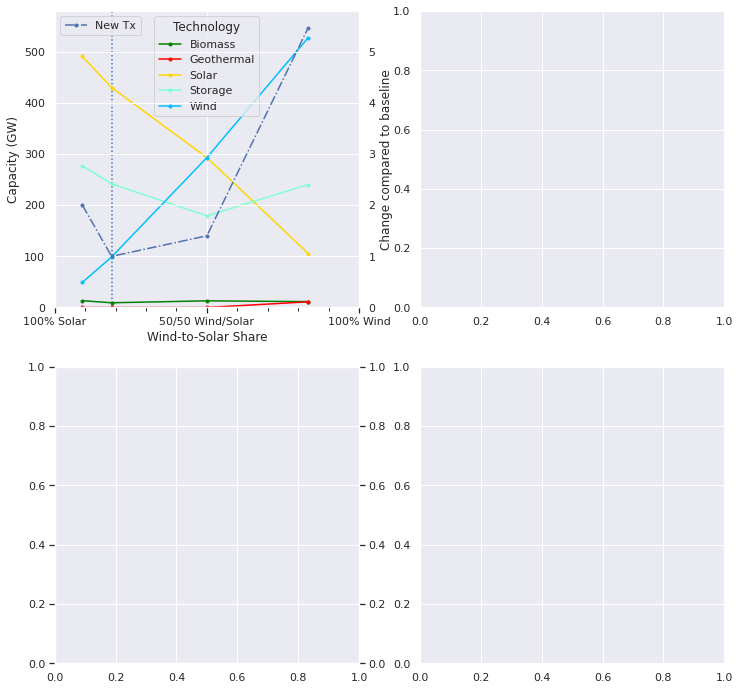

In [10]:
ax = ax1
rax = rax1
ax.clear()
rax.clear()
ax.tick_params(top=False, bottom=True, right=False, left=False, which="both")
rax.yaxis.set_label_position("right")
rax.yaxis.tick_right()
rax.tick_params(top=False, bottom=False, right=False, left=False, which="both")


ax.axvline(baseline, linestyle="dotted")

# Calculate transmission
tx = tools.get_dataframe("transmission.csv", usecols=["BuildTx", "trans_length_km", "scenario_name"], convert_dot_to_na=True).fillna(0)
tx["BuildTx"] *= tx["trans_length_km"]
tx = tx.groupby("scenario_name", as_index=False)["BuildTx"].sum().set_index("scenario_name")
tx /= tx.loc[baseline]
tx = tx.rename({"BuildTx": "New Tx"}, axis=1)
tx.plot(ax=rax, ylabel="Change compared to baseline", marker=".", linestyle="dashdot")

df = tools.get_dataframe("gen_cap.csv")
df = tools.transform.gen_type(df)
df = df.groupby(["scenario_name", "gen_type"], as_index=False)["GenCapacity"].sum()
df = df.pivot(columns="gen_type", index="scenario_name", values="GenCapacity")
df *= 1e-3 # Convert to GW
df = df.rename_axis("Technology", axis=1).rename_axis("Scenario")
# Remove zero columns
s = df.std()
df = df[[c for c in df.columns if c not in s[s==0]]]
# df -= df.loc[0.23] # Make it as change compared to baseline

df.plot(ax=ax, color=tools.get_colors(), marker=".", ylabel="Capacity (GW)")

ax.set_xlabel("Wind-to-Solar Share")
ax.set_xticks([0,0.5,1])
ax.set_xticks([0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9], minor=True)
ax.set_xticklabels(["100% Solar", "50/50 Wind/Solar", "100% Wind"]) 
rax.set_ylim(0, 5.8)
ax.set_ylim(0,580)



save()
# storage
# tx

Saved figure to /data/home/machstg/switch_runs/ldes_runs/LDES_paper_graphs/Figure 3


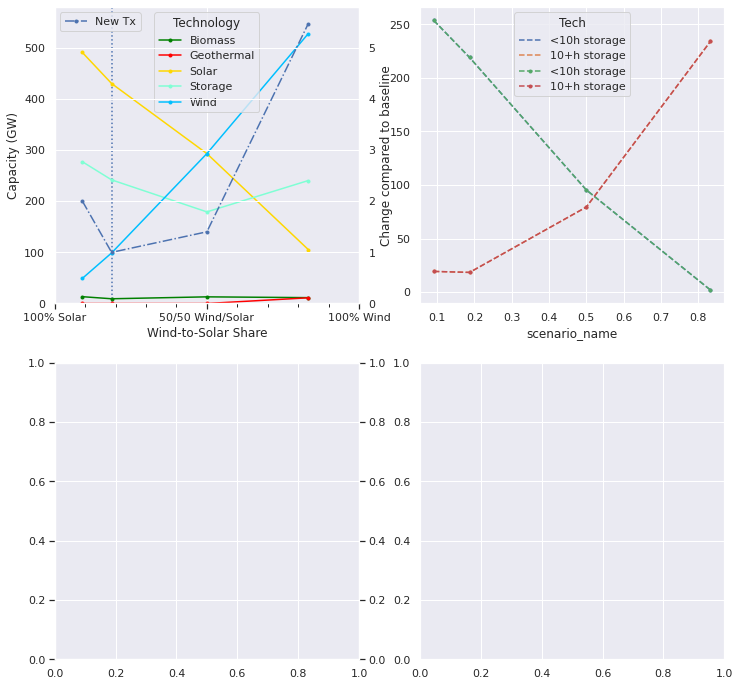

In [12]:
storage = tools.get_dataframe("storage_capacity.csv")
storage["duration"] = storage["OnlineEnergyCapacityMWh"] / storage["OnlinePowerCapacityMW"]
storage["duration_group"] = pd.cut(storage["duration"], [0,  10, float("inf")], labels=["<10h storage", "10+h storage"])
storage = storage.groupby(["scenario_name", "duration_group"], as_index=False)["OnlinePowerCapacityMW"].sum()
storage = storage.pivot(columns="duration_group", index="scenario_name", values="OnlinePowerCapacityMW").rename_axis("Tech", axis=1)
storage *= 1e-3
storage.plot(ax=ax2, marker=".", linestyle="dashed")

save()

Saved figure to /data/home/machstg/switch_runs/ldes_runs/LDES_paper_graphs/Figure 3


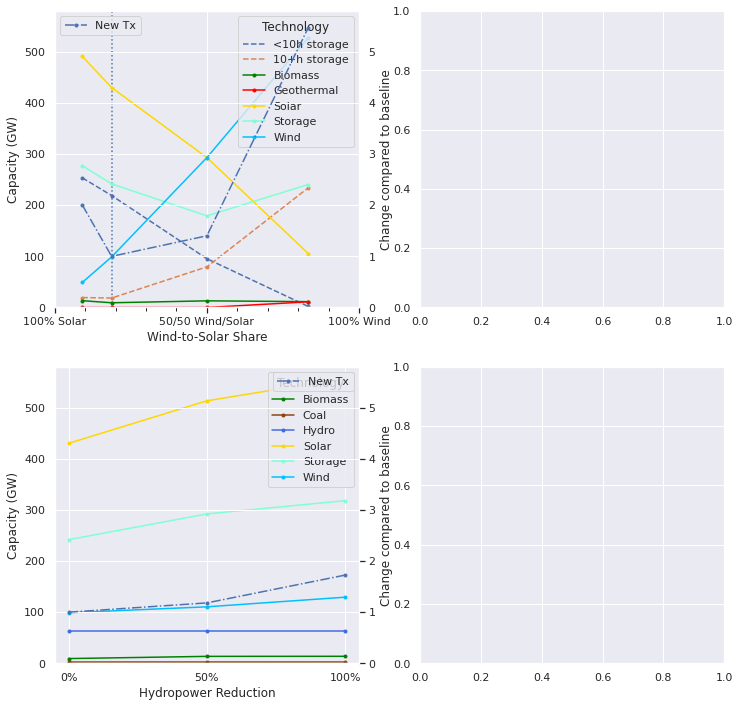

In [4]:
# Define scenarios
scenario_mapping = {1: "H25", .5: "H26", 0: "1342" }
scenarios = [Scenario(get_rel_path(p), name=n) for (n, p) in scenario_mapping.items()]

# Prepare graph tools
tools = GraphTools(scenarios=scenarios, graph_dir=graph_dir)
tools.pre_graphing(multi_scenario=True, name=output_file_name)

ax = ax3
rax = rax3
ax.clear()
rax.clear()
ax.tick_params(top=False, bottom=False, right=False, left=False, which="both")
rax.tick_params(top=False, bottom=False, right=False, left=False, which="both")
rax.yaxis.set_label_position("right")
rax.yaxis.tick_right()

df = tools.get_dataframe("gen_cap.csv")
df = tools.transform.gen_type(df)
df = df.groupby(["scenario_name", "gen_type"], as_index=False)["GenCapacity"].sum()
df = df.pivot(columns="gen_type", index="scenario_name", values="GenCapacity")
df *= 1e-3 # Convert to GW
df = df.rename_axis("Technology", axis=1).rename_axis("Scenario")
# Remove zero columns
s = df.std()
df = df[[c for c in df.columns if c not in s[s==0]]]
# df -= df.loc[0.23] # Make it as change compared to baseline

df.plot(ax=ax, color=tools.get_colors(), marker=".", ylabel="Capacity (GW)")

# Calculate transmission
tx = tools.get_dataframe("transmission.csv", usecols=["BuildTx", "trans_length_km", "scenario_name"], convert_dot_to_na=True).fillna(0)
tx["BuildTx"] *= tx["trans_length_km"]
tx = tx.groupby("scenario_name", as_index=False)["BuildTx"].sum().set_index("scenario_name")
tx /= tx.loc[0]
tx = tx.rename({"BuildTx": "New Tx"}, axis=1)
tx.plot(ax=rax, ylabel="Change compared to baseline", marker=".", linestyle="dashdot")

ax.set_xlabel("Hydropower Reduction")
rax.set_ylim(0, 5.8)
ax.set_ylim(0,580)
ax.set_xticks([0,0.5,1])
ax.xaxis.set_major_formatter(PercentFormatter(xmax=1))

save()
# storage
# tx